<a href="https://colab.research.google.com/github/katiacaroline00-ctrl/FIAP/blob/main/Tech_Challenge_Fase_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [185]:
# Carregamento da base de dados e visualização
df = pd.read_csv("dados_historicos_ibovespa_1992_a_2025.csv", sep=",")
df.head(20)


,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,30.12.2009,68.588,68.277,68.588,67.749,"1,18M","0,43%"
1,29.12.2009,68.296,67.902,68.309,67.902,"669,25K","0,58%"
2,28.12.2009,67.902,67.591,68.277,67.591,"556,35K","0,46%"
3,23.12.2009,67.589,67.418,67.810,66.943,"904,33K","0,25%"
4,22.12.2009,67.418,65.940,67.421,65.940,"1,27M","2,26%"
5,21.12.2009,65.925,66.806,67.671,65.925,"1,41M","-1,30%"
6,18.12.2009,66.794,67.068,67.281,66.322,"1,08M","-0,41%"
7,17.12.2009,67.068,68.619,68.619,66.792,"1,34M","-2,26%"
8,16.12.2009,68.622,69.310,69.622,68.466,"1,71M","-0,99%"
9,15.12.2009,69.311,69.345,69.515,68.822,"1,28M","-0,05%"


In [186]:
# Verifica se a base tem campo nulo
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,1
Var%,0


In [187]:
# Substitui o campo nulo da coluna "Vol." por zero
df['Vol.'] = df['Vol.'].fillna(0)


In [188]:
# Verifica se, na base de dados, ainda consta campo nulo
df.isnull().sum()

,0
Data,0
Último,0
Abertura,0
Máxima,0
Mínima,0
Vol.,0
Var%,0


In [189]:
# Verifica o tipo do dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8397 entries, 0 to 8396
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      8397 non-null   object 
 1   Último    8397 non-null   float64
 2   Abertura  8397 non-null   float64
 3   Máxima    8397 non-null   float64
 4   Mínima    8397 non-null   float64
 5   Vol.      8397 non-null   object 
 6   Var%      8397 non-null   object 
dtypes: float64(4), object(3)
memory usage: 459.3+ KB


In [191]:
# Converte a coluna "Data" (que estava como string) em data, e classifica do mais antigo para mais novo.

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df.sort_values('Data').reset_index(drop=True)
df.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,1992-01-02,1.0,1.0,1.0,1.0,"11,81B","0,00%"
1,1992-01-03,1.0,1.0,1.0,1.0,"14,53B","0,00%"
2,1992-01-06,1.0,1.0,1.0,1.0,"67,39B","0,00%"
3,1992-01-07,1.0,1.0,1.0,1.0,"15,81B","0,00%"
4,1992-01-08,1.0,1.0,1.0,1.0,"52,31B","0,00%"
5,1992-01-09,1.0,1.0,1.0,1.0,"29,10B","0,00%"
6,1992-01-10,1.0,1.0,1.0,1.0,"33,44B","0,00%"
7,1992-01-13,1.0,1.0,1.0,1.0,"45,44B","0,00%"
8,1992-01-14,1.0,1.0,1.0,1.0,"52,38B","0,00%"
9,1992-01-15,1.0,1.0,1.0,1.0,"40,22B","0,00%"


In [192]:
# Conversão de colunas para formato numérico
colunas_preco = ['Último', 'Abertura', 'Máxima', 'Mínima']
for col in colunas_preco:
        df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [193]:
# Validar se [colunas_preco] estão em formato numérico.
df.dtypes[colunas_preco]

,0
Último,float64
Abertura,float64
Máxima,float64
Mínima,float64


In [194]:
# Engenharia de Atributos (Features)

# Retornos
df['ret_1'] = df['Último'].pct_change(1)
df['ret_5'] = df['Último'].pct_change(5)
df['ret_10'] = df['Último'].pct_change(10)
df['ret_20'] = df['Último'].pct_change(20)

# Médias Móveis
df['ma_5'] = df['Último'].rolling(5).mean()
df['ma_10'] = df['Último'].rolling(10).mean()
df['ma_20'] = df['Último'].rolling(20).mean()

# Ratios (Preço vs Média)
df['ma_ratio_5'] = df['Último'] / df['ma_5']
df['ma_ratio_10'] = df['Último'] / df['ma_10']
df['ma_ratio_20'] = df['Último'] / df['ma_20']

# Diferença de Médias (Tendência)
df['ma_diff'] = (df['ma_5'] - df['ma_10']) / df['Último']
# Força da tendência (Ex: inclinação ou distância MA curta vs longa)
df['trend_strength'] = (df['ma_5'] - df['ma_20']) / df['Último']

# Volatilidade
df['vol_5'] = df['ret_1'].rolling(5).std()
df['vol_10'] = df['ret_1'].rolling(10).std()
df['vol_20'] = df['ret_1'].rolling(20).std()
df['vol_ratio'] = df['vol_5'] / df['vol_10']

# Amplitude diária
df['range'] = (df['Máxima'] - df['Mínima']) / df['Último']

#Candle
df['candle_body'] = (df['Último'] - df['Abertura']) / df['Abertura']

# RSI (Índice de Força Relativa) -->  O RSI é crucial para saber se está "caro" ou "barato" no curto prazo
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['rsi_14'] = calculate_rsi(df['Último'])

In [195]:
# Target: 1 se fechamento de AMANHÃ > fechamento de HOJE
df['target'] = (df['Último'].shift(-1) > df['Último']).astype(int)

# Remover NaNs gerados pelos cálculos de janelas e lags
df.dropna(inplace=True)

In [196]:
# Lista de features
features = ['ret_1', 'ret_5', 'ret_10', 'ret_20',
    'ma_ratio_5', 'ma_ratio_10', 'ma_ratio_20',
    'ma_diff', 'trend_strength',
    'vol_5', 'vol_10', 'vol_20', 'vol_ratio',
    'range', 'candle_body', 'rsi_14']


X = df[features]
y = df['target']

In [197]:
# Separação Treino e Teste (Últimos 30 dias)
X_train = X.iloc[:-30]
y_train = y.iloc[:-30]
X_test = X.iloc[-30:]
y_test = y.iloc[-30:]

In [198]:
# Modelagem com Random Forest
model = RandomForestClassifier(
    n_estimators=500,        # Mais árvores para estabilidade
    max_depth=5,             # Profundidade limitada para evitar overfitting
    min_samples_leaf=4,      # Mínimo de amostras para generalizar melhor
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [199]:
#Otimização de Threshold (O "Pulo do Gato" para acurácia)
# Modelos padrões usam 0.5 como corte. Se o mercado está muito em alta,
# baixar o corte pode capturar melhor a tendência.
probs_test = model.predict_proba(X_test)[:, 1]

best_threshold = 0.5
best_acc = 0


In [200]:
# Testar qual limite maximiza a acurácia (simulação de ajuste fino)
for threshold in np.arange(0.3, 0.7, 0.05):
    y_pred_temp = (probs_test >= threshold).astype(int)
    acc_temp = accuracy_score(y_test, y_pred_temp)
    if acc_temp > best_acc:
        best_acc = acc_temp
        best_threshold = threshold

print(f"Melhor Threshold encontrado: {best_threshold:.2f}")

Melhor Threshold encontrado: 0.30


In [201]:
# Previsão Final com o melhor threshold
y_pred = (probs_test >= best_threshold).astype(int)

In [202]:
# Resultados
print("-" * 30)
print(f"Acurácia Final: {accuracy_score(y_test, y_pred):.2%}")
print("-" * 30)
print(classification_report(y_test, y_pred))

------------------------------
Acurácia Final: 63.33%
------------------------------
              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.64      0.95      0.77        19

    accuracy                           0.63        30
   macro avg       0.57      0.52      0.46        30
weighted avg       0.59      0.63      0.54        30



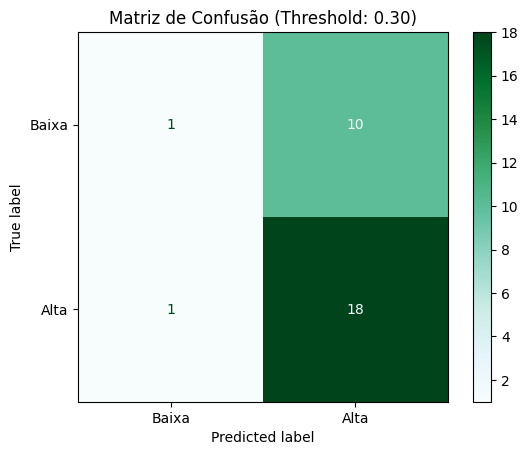

In [203]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Baixa', 'Alta'])
disp.plot(cmap='BuGn')
values_format='d'
plt.title(f"Matriz de Confusão (Threshold: {best_threshold:.2f})")
plt.show()

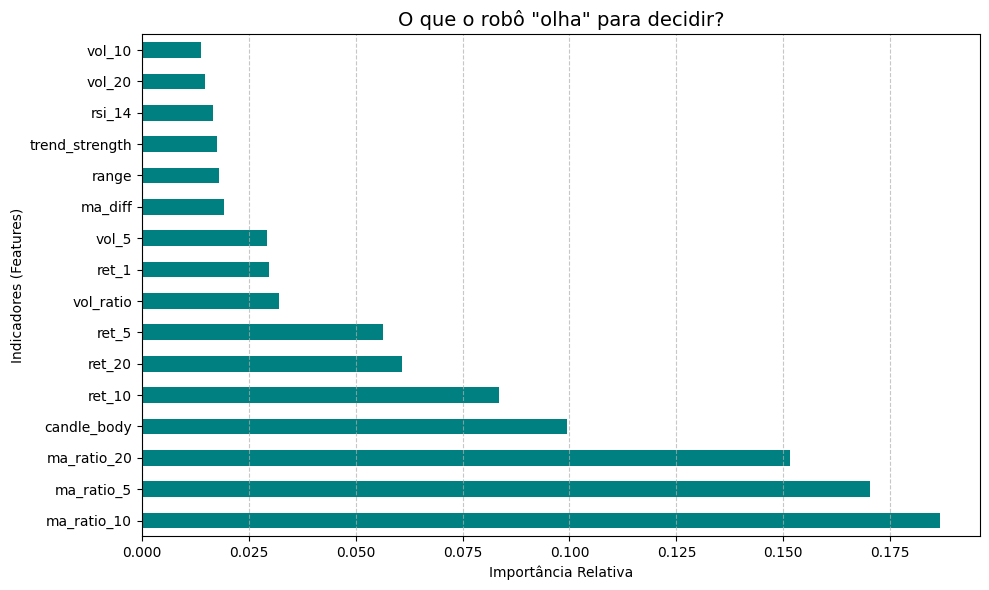

In [204]:
# Importância das Features (Para o Storytelling)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='teal') # barh para barras horizontais facilita a leitura
plt.title('O que o robô "olha" para decidir?', fontsize=14)
plt.xlabel('Importância Relativa')
plt.ylabel('Indicadores (Features)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()